In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab

import seaborn as sns

import csv

import scipy
from scipy import stats
import statistics

In [2]:
%matplotlib inline
import deepdish as dd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
import brainiak.eventseg.event
from scipy import stats
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition
import seaborn as sns 
import numpy as np

In [3]:
vectorDim = 100

numNode = 1000

reps = 40 #50
kvalues = 20

# the data structures to save the means for the coherent and incoherent
coherent_means = np.empty(reps)
incoherent_means = np.empty(reps)

coherent_vars_1 = np.empty(reps)
coherent_vars_2 = np.empty(reps) 

incoherent_vars_1 = np.empty(reps)
incoherent_vars_2 = np.empty(reps) 

likelihood = np.zeros([kvalues,reps,2])



In [4]:
# now the radical loop: 1. run 2 reservoirs; 2. calculate time contst; 
# 3.sort;  4. segment (ubuntu)
# here we will just segment the sorted reservoir states

kvalues = 20
reps = 40
for res_seed in range(reps):
 
    ###################################################################
    #
    #               4. Segment
    
    string1 = '/home/peter/Downloads/data_erd_states/mod_in_True_mod_topTrue_Direct_False_%s.npy' % res_seed

    sherl_erd_adj_SortedStates = np.load(string1) 

    # get the pieces
    #sherl_erd_adj_time1=sherl_erd_adj_SortedStates[:,0:99]
    #sherl_erd_adj_time2=sherl_erd_adj_SortedStates[:,900:999]
    
    sherl_erd_adj_time1=sherl_erd_adj_SortedStates[:,300:399]
    sherl_erd_adj_time2=sherl_erd_adj_SortedStates[:,400:599]
 
    if res_seed == 0:
        sherl_erd_adj_time1_cumul = sherl_erd_adj_time1
        sherl_erd_adj_time2_cumul = sherl_erd_adj_time2
    else:
        sherl_erd_adj_time1_cumul = sherl_erd_adj_time1 + sherl_erd_adj_time1_cumul
        sherl_erd_adj_time2_cumul = sherl_erd_adj_time2 + sherl_erd_adj_time2_cumul
    
    # now test the different k values
    
    for iteration in range(kvalues):

        ###################################################################
        #
        #               4. Segment

        #simple data structure for testing

        step = 2
        # Train the two HMS with the predicted segments
        ev_time1 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time1.fit(sherl_erd_adj_time1[1000:1650,:])

        ev_time2 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time2.fit(sherl_erd_adj_time2[1000:1650,:])
        print((iteration+1)*step)

        # save the variablility scores

        coherent_ev1_var = ev_time1.event_var_
        coherent_ev2_var = ev_time2.event_var_

        # save likelihood scores
        #likelihood[iteration, res_seed,0] = ev_time1.ll_[len(ev_time1.ll_)-1]
        #likelihood[iteration, res_seed,1] = ev_time2.ll_[len(ev_time2.ll_)-1]
        a,likelihood[iteration, res_seed,0] = ev_time1.find_events(sherl_erd_adj_time1)
        a,likelihood[iteration, res_seed,1] = ev_time2.find_events(sherl_erd_adj_time2)

        print("res_seed = ", res_seed)
        print("Likelihood")
        print(*likelihood[iteration, res_seed,:], sep='\n')


2
res_seed =  0
Likelihood
-4734.035094830274
-4644.543764520832
4
res_seed =  0
Likelihood
-4761.884436255142
-4792.224788244276
6
res_seed =  0
Likelihood
-4146.111717262528
-4844.639931850089
8
res_seed =  0
Likelihood
-4181.358401764767
-5063.917839662944
10
res_seed =  0
Likelihood
-4266.343612853457
-5215.135445841269
12
res_seed =  0
Likelihood
-4343.671874469511
-5491.420031351273
14
res_seed =  0
Likelihood
-4668.346586066281
-5825.334766550271
16
res_seed =  0
Likelihood
-4814.097285666488
-6127.533937715
18
res_seed =  0
Likelihood
-4918.294755228857
-6480.099918191122
20
res_seed =  0
Likelihood
-5113.71122340548
-6576.978482270348
22
res_seed =  0
Likelihood
-5293.941180149999
-7163.245866291494
24
res_seed =  0
Likelihood
-5446.681859734132
-7469.301374707954
26
res_seed =  0
Likelihood
-5616.786116731168
-7685.137684072439
28
res_seed =  0
Likelihood
-5858.843741652288
-8102.466573646169
30
res_seed =  0
Likelihood
-6061.5219750174065
-8487.662143114303
32
res_seed =  0


12
res_seed =  6
Likelihood
-4768.274402366932
-5442.039582444813
14
res_seed =  6
Likelihood
-4914.707127449301
-5844.014759376793
16
res_seed =  6
Likelihood
-5015.876896623412
-5979.764197733033
18
res_seed =  6
Likelihood
-5182.439971013022
-6490.291332602187
20
res_seed =  6
Likelihood
-5378.696115532279
-6708.679799429223
22
res_seed =  6
Likelihood
-5437.37726117923
-7047.174654682155
24
res_seed =  6
Likelihood
-5672.507826333825
-7442.409904077867
26
res_seed =  6
Likelihood
-5794.258103082874
-7886.9611135816895
28
res_seed =  6
Likelihood
-6192.950898968
-8311.53708779208
30
res_seed =  6
Likelihood
-6350.59330792735
-8773.557493209808
32
res_seed =  6
Likelihood
-6592.945398547415
-9130.20606943725
34
res_seed =  6
Likelihood
-6858.470225854767
-9765.224570097102
36
res_seed =  6
Likelihood
-6745.317884940874
-10109.24568622578
38
res_seed =  6
Likelihood
-7418.075719026426
-10562.900436762859
40
res_seed =  6
Likelihood
-7346.773882796313
-11330.035817539094
2
res_seed =  

20
res_seed =  12
Likelihood
-5175.638847502584
-5594.855951705988
22
res_seed =  12
Likelihood
-5420.5250152521585
-5935.59476636839
24
res_seed =  12
Likelihood
-5500.9639229783825
-6136.478962138853
26
res_seed =  12
Likelihood
-5783.943855093306
-6400.498253123407
28
res_seed =  12
Likelihood
-5903.265766798175
-6808.7645283842785
30
res_seed =  12
Likelihood
-6182.671786812947
-7225.769786687284
32
res_seed =  12
Likelihood
-6337.210771038455
-7555.538487274056
34
res_seed =  12
Likelihood
-6585.848788957974
-8023.935483383959
36
res_seed =  12
Likelihood
-6852.564165484566
-8559.850396256214
38
res_seed =  12
Likelihood
-7162.254117237417
-8871.123594733586
40
res_seed =  12
Likelihood
-7212.463039238418
-9442.596936045933
2
res_seed =  13
Likelihood
-4604.07500053073
-4717.347904201456
4
res_seed =  13
Likelihood
-4338.391853109829
-4908.328846068938
6
res_seed =  13
Likelihood
-4640.548971090367
-5055.152325109768
8
res_seed =  13
Likelihood
-4736.851989313343
-5319.99707566984

26
res_seed =  18
Likelihood
-6032.016292465468
-7592.237369313988
28
res_seed =  18
Likelihood
-6178.414271326843
-8023.969326043718
30
res_seed =  18
Likelihood
-6224.355461816821
-8416.190728381098
32
res_seed =  18
Likelihood
-6540.915635011064
-8966.82490747181
34
res_seed =  18
Likelihood
-6722.80906697561
-9331.24712673569
36
res_seed =  18
Likelihood
-6905.249301786887
-10081.645728120284
38
res_seed =  18
Likelihood
-7190.896599180232
-10617.668729848916
40
res_seed =  18
Likelihood
-7473.628483430731
-11046.769808554027
2
res_seed =  19
Likelihood
-4556.442440581219
-4522.715737713346
4
res_seed =  19
Likelihood
-4416.052409553386
-4536.578328757762
6
res_seed =  19
Likelihood
-4407.27643176811
-4802.8937014942985
8
res_seed =  19
Likelihood
-4518.155029556995
-5002.913559259672
10
res_seed =  19
Likelihood
-3866.2532930455313
-4944.743271897531
12
res_seed =  19
Likelihood
-3911.6269871380705
-5226.76405494066
14
res_seed =  19
Likelihood
-3958.942228194704
-5441.94843924414

/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-5606.940089895541
-10358.279258759685
18


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-5842.8828710682
-11473.91029511887
20


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-6048.174845611408
-12296.105188930087
22


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-6359.060487691426
-13207.195038800512
24


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-6526.920151115442
-13941.730496480051
26


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-6780.559595148633
-15240.28373440661
28


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-7058.038195066263
-16194.785478305532
30


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-7371.775954174584
-17165.950855695133
32


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-7597.531215285979
-18560.798622935
34


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-8049.700110366188
-19685.488275408243
36


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-8404.307924549783
-20456.832635845018
38


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-8296.700102706121
-22182.35650889092
40


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  20
Likelihood
-9258.287673930736
-23514.444849481268
2
res_seed =  21
Likelihood
-4563.710550230251
-4763.294698327383
4
res_seed =  21
Likelihood
-4398.178389129164
-4774.283931519169
6
res_seed =  21
Likelihood
-4488.4430233892635
-4861.365474577963
8
res_seed =  21
Likelihood
-4213.7004801813655
-5029.087498757024
10
res_seed =  21
Likelihood
-4669.972815288376
-5225.93836845115
12
res_seed =  21
Likelihood
-4641.699003109949
-5475.155826434846
14
res_seed =  21
Likelihood
-4779.686749413777
-5830.400948542338
16
res_seed =  21
Likelihood
-4776.507936782538
-6253.932243381495
18
res_seed =  21
Likelihood
-4954.69268472332
-6425.6155114168105
20
res_seed =  21
Likelihood
-4970.5957886868
-7096.358045702566
22
res_seed =  21
Likelihood
-5141.370830198084
-7034.083527801496
24
res_seed =  21
Likelihood
-5281.314756721042
-7450.896027457714
26
res_seed =  21
Likelihood
-5490.206826258694
-8039.146224887864
28
res_seed =  21
Likelihood
-5588.82529451566
-8545.363065306921
30


6
res_seed =  27
Likelihood
-4463.494011455112
-4108.646666297156
8
res_seed =  27
Likelihood
-4437.080627208275
-4220.2477659558435
10
res_seed =  27
Likelihood
-4720.781158249672
-4444.042157268898
12
res_seed =  27
Likelihood
-4799.511579024581
-4429.198211348674
14
res_seed =  27
Likelihood
-4526.9792580096255
-4395.80118282928
16
res_seed =  27
Likelihood
-4559.420045975587
-4634.7973574727275
18
res_seed =  27
Likelihood
-4710.002171937959
-4824.941984364374
20
res_seed =  27
Likelihood
-4877.1441932035805
-5365.195908881333
22
res_seed =  27
Likelihood
-5001.342597620355
-5251.3926281014
24
res_seed =  27
Likelihood
-5231.139272327409
-5880.033881193236
26
res_seed =  27
Likelihood
-5385.961971368272
-6257.179737612543
28
res_seed =  27
Likelihood
-5560.395930752877
-6514.0914202364465
30
res_seed =  27
Likelihood
-5749.958643838851
-6795.352723890989
32
res_seed =  27
Likelihood
-6143.1312034461735
-7217.713793251361
34
res_seed =  27
Likelihood
-6382.4440402338705
-7544.940402

12
res_seed =  33
Likelihood
-5166.099952852997
-5715.496799449996
14
res_seed =  33
Likelihood
-5344.2264222906315
-6114.972574978401
16
res_seed =  33
Likelihood
-5499.707958949481
-6457.930896988651
18
res_seed =  33
Likelihood
-5470.894438326401
-6932.1908047695815
20
res_seed =  33
Likelihood
-5607.774327705318
-7312.230292347056
22
res_seed =  33
Likelihood
-6066.8123100134435
-7743.486710757738
24
res_seed =  33
Likelihood
-6213.292780087622
-8156.551164200425
26
res_seed =  33
Likelihood
-6089.124270320442
-8590.704648037683
28
res_seed =  33
Likelihood
-6445.474256292372
-9100.45437882813
30
res_seed =  33
Likelihood
-6654.049094973125
-9601.05948268134
32
res_seed =  33
Likelihood
-6949.818346311614
-10376.940551366066
34
res_seed =  33
Likelihood
-7199.010795284398
-10921.26499783798
36
res_seed =  33
Likelihood
-7300.166976362694
-11502.268484814587
38
res_seed =  33
Likelihood
-7608.052784793225
-12138.030248318484
40
res_seed =  33
Likelihood
-7927.330085404783
-12804.094

/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-6139.533405706431
-10790.688382478433
20


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-6431.602708519655
-11959.902134300188
22


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-6756.397389505257
-13533.880065954905
24


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-7125.29167831254
-15207.171323826222
26


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-7558.509343865297
-16371.566859014902
28


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-8012.8836168522175
-17611.527517851333
30


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-8376.829246540454
-19305.037421676345
32


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-8636.170502795456
-20842.127561045992
34


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-9205.425519527025
-22380.595899226988
36


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-9702.738111396402
-24051.088961673737
38


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-10019.775665982135
-26510.57954531873
40


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  34
Likelihood
-10727.998598541204
-28128.563936099956
2
res_seed =  35
Likelihood
-4418.276541160036
-4532.662752086624
4
res_seed =  35
Likelihood
-3904.6580759683507
-4246.889732186687
6
res_seed =  35
Likelihood
-4055.4259568923053
-4236.968649931005
8
res_seed =  35
Likelihood
-4098.022318185975
-4324.776822743965
10
res_seed =  35
Likelihood
-4332.546911550431
-4462.041893859039
12
res_seed =  35
Likelihood
-4481.93581797488
-4672.639623808201
14
res_seed =  35
Likelihood
-4496.993588549126
-4870.960430575782
16
res_seed =  35
Likelihood
-4640.895923736894
-4966.731624375064
18
res_seed =  35
Likelihood
-4731.050175754398
-5196.506537358962
20
res_seed =  35
Likelihood
-4860.158975791879
-5544.469324351648
22
res_seed =  35
Likelihood
-4958.328066873088
-5656.5008873103525
24
res_seed =  35
Likelihood
-5151.899416557428
-5984.231161015027
26
res_seed =  35
Likelihood
-5362.969223071951
-6279.860286132843
28
res_seed =  35
Likelihood
-5348.269051067573
-6526.19788185184

/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-6956.062469967991
-14233.824657248306
26


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-7291.225405073452
-15613.230117773574
28


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-7598.37976625901
-16844.177223477964
30


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-7936.6660466501735
-18511.950276378102
32


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-8427.261470567853
-20427.03972575731
34


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-8828.765560384709
-23333.027527170383
36


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-9235.076287778647
-24763.150964943714
38


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


res_seed =  39
Likelihood
-9806.486538215844
-27284.131510929165
40
res_seed =  39
Likelihood
-9963.800729365472
-28949.9194800835


/home/peter/miniconda3/lib/python3.7/site-packages/brainiak/eventseg/event.py:362: RuntimeWarning: invalid value encountered in subtract
  log_gamma -= np.logaddexp.reduce(log_gamma, axis=1, keepdims=True)


In [5]:
#for the figure get the mean reservoir states
sherl_erd_adj_time1_last = sherl_erd_adj_time1
sherl_erd_adj_time2_last = sherl_erd_adj_time2

np.save('sherl_erd_adj-time1-last-june10.npy', sherl_erd_adj_time1) 
np.save('sherl_erd_adj-time2-last-june10.npy', sherl_erd_adj_time2) 



In [6]:
sherl_erd_adj_time1 = np.load('sherl_erd_adj-time1-last-june10.npy') 
sherl_erd_adj_time2 = np.load('sherl_erd_adj-time2-last-june10.npy') 


In [7]:
sherl_erd_adj_time1 = sherl_erd_adj_time1_cumul/reps
sherl_erd_adj_time2 = sherl_erd_adj_time2_cumul/reps

In [8]:
#save the data likelihood
np.save('sherl_erd_adj-time1-june10.npy', sherl_erd_adj_time1) 
np.save('sherl_erd_adj-time2-june10.npy', sherl_erd_adj_time2) 

np.save('likelihood-june10.npy', likelihood) 

In [9]:
sherl_erd_adj_time1 = sherl_erd_adj_time1_last
sherl_erd_adj_time2 = sherl_erd_adj_time2_last

In [10]:
# sement and make figure

ev_time1 = brainiak.eventseg.event.EventSegment(22)
ev_time1.fit(sherl_erd_adj_time1[1000:1650,:])

ev_time2 = brainiak.eventseg.event.EventSegment(8)
ev_time2.fit(sherl_erd_adj_time2[1000:1650,:])


for j in range(99):
    mean = sherl_erd_adj_time1[:,j].mean()
    if abs(mean) > 0.01: #WAS .01
        sherl_erd_adj_time1[:,j] = sherl_erd_adj_time1[:,j]/mean

for j in range(99):
    mean = sherl_erd_adj_time2[:,j].mean()
    if abs(mean) > 0.01:
        sherl_erd_adj_time2[:,j] = sherl_erd_adj_time2[:,j]/mean

#save the data likelihood
#np.save('sherl_erd_adj-time1-june6.npy', sherl_erd_adj_time1) 
#np.save('sherl_erd_adj-time2-june6.npy', sherl_erd_adj_time2) 

#np.save('likelihood-june6.npy', likelihood) 

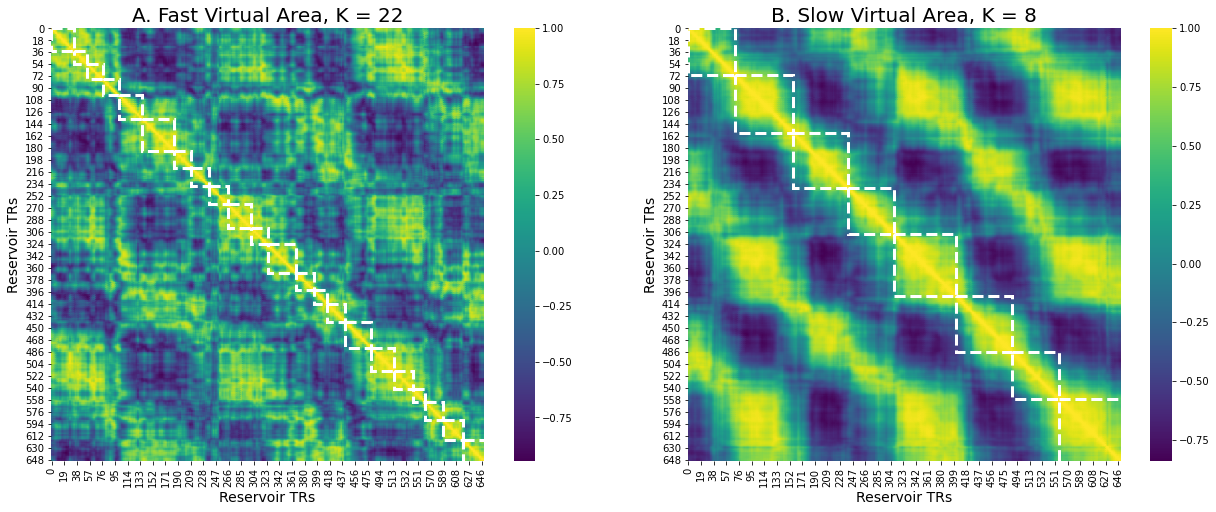

In [11]:
# 3 display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(18, 7))

fig.add_subplot(121)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_adj_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_adj_time1),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_adj_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(122)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_adj_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_adj_time2),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_adj_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)


fig.tight_layout()
plt.savefig('Exp4-erd.png')

In [12]:
tmatrix=np.zeros([kvalues,kvalues])
pmatrix=np.zeros([kvalues,kvalues])
dmatrix=np.zeros([kvalues,kvalues])
                  

In [13]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

for j in range(kvalues):
    for i in range(j):
        # when i < j
        anti = (likelihood[i,:,0]+ likelihood[j,:,1])/2 # small k with fast area + large k with slow area 
        pro = (likelihood[j,:,0]+ likelihood[i,:,1])/2  # large k with fast area + small k with slow area
        dmatrix[i,j]=np.mean(pro-anti)
        t,p = stats.ttest_rel(pro,anti)
        tmatrix[i,j]=t
        pmatrix[i,j]=p
        #if t > 0 and p< 0.01:
        if p<0.01:
            print(i,j,t,p)


0 1 3.383064585551066 0.0016433101558096061
0 2 3.12956344745241 0.0033090611380615096
0 3 4.083320136047379 0.000213290919060225
2 3 3.011489562155795 0.004545411734069393
0 4 3.984637727663026 0.00028672165921827066
1 4 2.8519667829041304 0.006914505826173169
2 4 3.486155907147479 0.0012280586159486495
0 5 4.628538696712212 4.0129835829429094e-05
1 5 3.73986525716338 0.0005909481455701703
2 5 4.431626526861995 7.382415981134705e-05
3 5 4.2676980924979135 0.00012200327998373054
4 5 5.1443649089065095 7.933813872511345e-06
0 6 5.095590693050485 9.258821451603655e-06
1 6 4.354932453925975 9.344178191007251e-05
2 6 4.892296750246336 1.7583394735957487e-05
3 6 4.980585919914493 1.3315222037610109e-05
4 6 5.331501591851061 4.379448779663539e-06
5 6 4.048387317630206 0.00023690272525369316
0 7 5.235221005527422 5.9473360475803215e-06
1 7 4.635490076361782 3.9271211788267395e-05
2 7 5.059798739277686 1.0368609320704208e-05
3 7 5.121756022758143 8.52283486072292e-06
4 7 5.449806703562746 3.00

(20, 20)
49
5.493320043884258e-07
4.385135828774284e-06


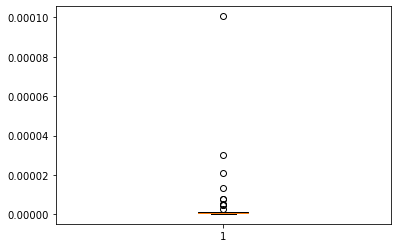

In [14]:
print(pmatrix.shape)

pmeans=np.zeros([50])
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

count=0
for i in range(3,8):
    for j in range(9,19):
        #print(i,j,pmatrix[i,j],count)
        pmeans[count]=pmatrix[i,j]
        count=count+1
print(count-1)
print(statistics.median(pmeans))
print(statistics.mean(pmeans))
plt.boxplot(pmeans)
plt.show()

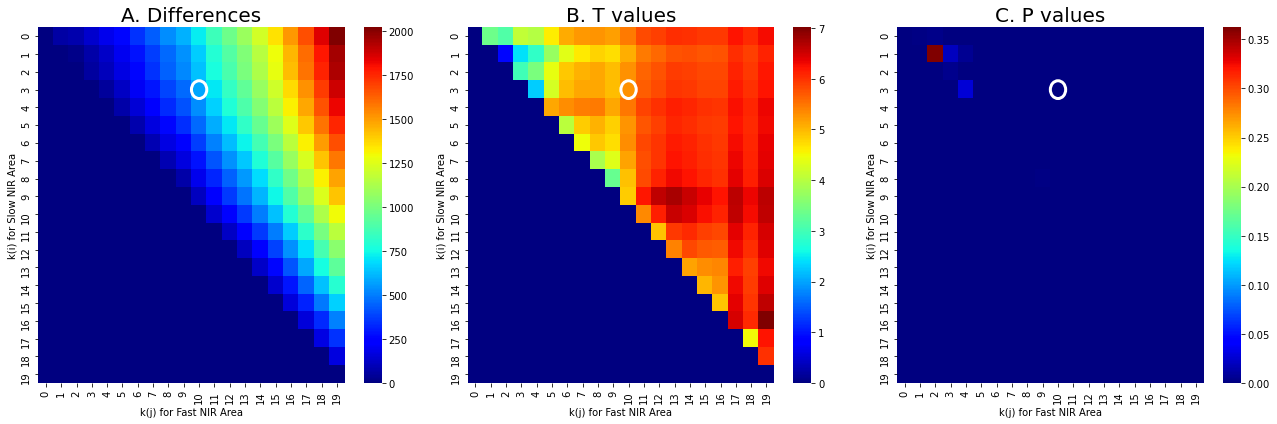

In [15]:
# 3 display the segmentation
color='jet'
ec='black'
scale=0.9
lw=2

fs1 = 14
fs2 = 20



fig=plt.figure(figsize=(18, 6))

fig.add_subplot(131)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('A. Differences', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(132)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(tmatrix, cmap=color)
plt.title('B. T values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(133)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('C. P values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.tight_layout()
plt.savefig('likelihoodk-areas-no-norm-erd.png')

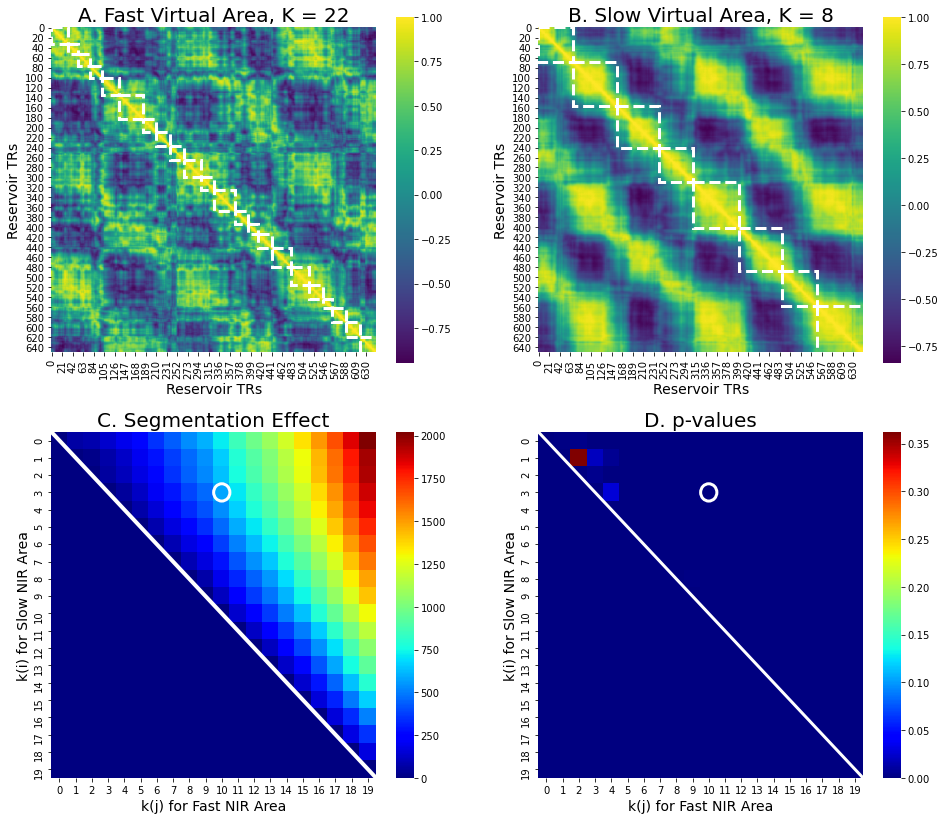

In [16]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_adj_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_adj_time1),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_adj_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_adj_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_adj_time2),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_adj_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################
color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-sherl_erd_adj.png', dpi=600)


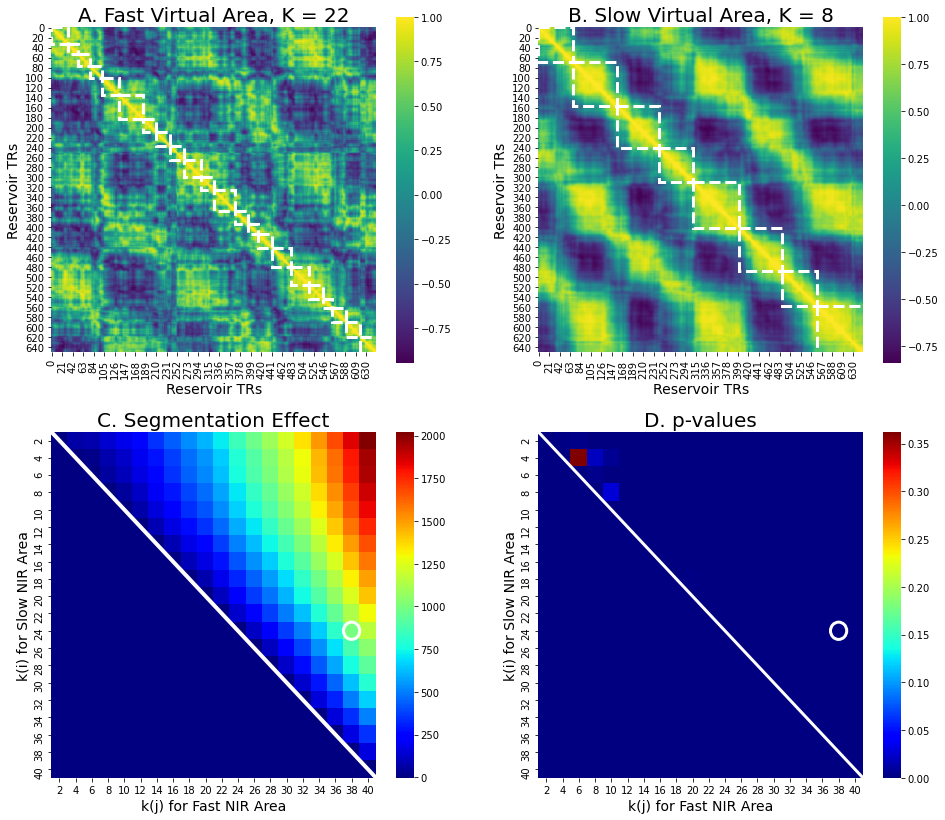

In [17]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_adj_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_adj_time1),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_adj_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(sherl_erd_adj_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(sherl_erd_adj_time2),cmap=color)
sns.heatmap(np.corrcoef(sherl_erd_adj_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################

A1 = np.linspace(2,40,20, dtype=int)
A2 = np.linspace(2,40,20, dtype=int)

color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((18.5, 11.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color, xticklabels=A1, yticklabels=A2,vmin=-3)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((18.5, 11.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color, xticklabels=A1, yticklabels=A2)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-sherl_erd_adj.png', dpi=600)


Text(0, 0.5, 'Log likelihood difference')

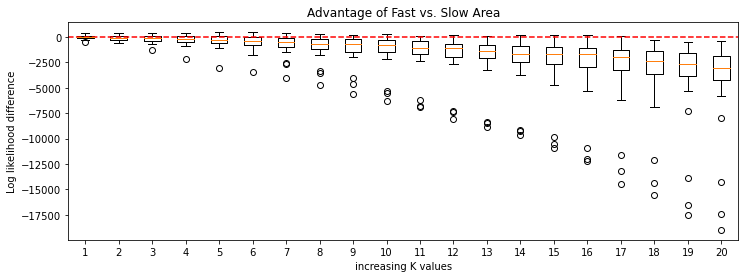

In [18]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# small K is slow, likelihood 1 is slow
# high K is fast, likelihood 0 is fast

#model k
#slow slow - fast slow
#slow fast - fast fast


f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.boxplot(likelihood[:,:,1].T-likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,1].T)
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

(array([ 3.,  0.,  0.,  0.,  0.,  0.,  3.,  9., 14., 11.]),
 array([-9292.71260884, -8826.4928875 , -8360.27316617, -7894.05344484,
        -7427.8337235 , -6961.61400217, -6495.39428084, -6029.1745595 ,
        -5562.95483817, -5096.73511684, -4630.5153955 ]),
 <BarContainer object of 10 artists>)

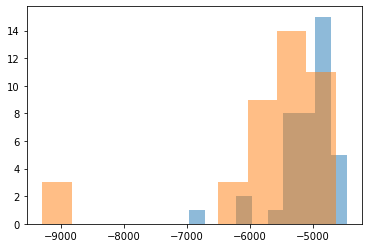

In [19]:
data3 = (likelihood[3,:,0]+ likelihood[10,:,1])/2
data4 = (likelihood[10,:,0]+ likelihood[3,:,1])/2

plt.hist(data4, alpha=0.5)
plt.hist(data3,alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f18ffd7a750>,
 'caps': [<matplotlib.lines.Line2D at 0x7f18ffd7afd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f18ffd7a3d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f18ffd038d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f18ffd03d10>,
 'means': []}

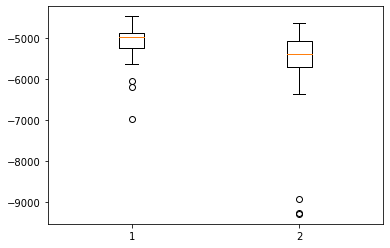

In [20]:
plt.boxplot([data4,data3])

In [21]:
#4 15 4.307048321216739 7.923701639107483e-05
t,p = stats.ttest_rel(data4,data3)
print(t)
print(p)
print(np.mean(data4-data3))

5.312100613524121
4.65822474819256e-06
578.1122120997992


In [22]:
print(np.shape(likelihood))
print(kvalues)

(20, 40, 2)
20


<AxesSubplot:>

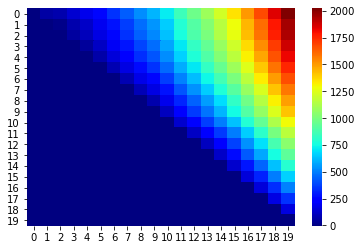

In [23]:
sns.heatmap(dmatrix,cmap='jet',vmin=-3)

In [24]:
print(dmatrix[11,13:20])
print(pmatrix[11,13:20])      

[ 234.42963184  364.38281594  500.82768312  659.8845983   819.00157808
  997.10177915 1166.96113479]
[5.85353237e-07 4.28774249e-07 7.09003612e-07 8.64143576e-07
 1.51649108e-07 3.63554818e-07 1.13445318e-07]


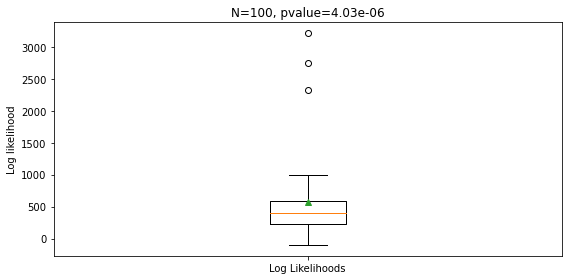

In [25]:

fig=plt.figure(figsize=(8, 4))
#f,ax = plt.subplots(1,1, figsize=(5, 5))
plt.boxplot(data4-data3,showmeans=True)
#plt.xlabel('Coherent                                    Incoherent')
plt.ylabel('Log likelihood')
#plt.axhline(y=0, color='r', linestyle='--')

plt.xticks([1], ['Log Likelihoods'])#ax.set_xticklabels(['Coherent-Incoherent'])
plt.title('N=100, pvalue=4.03e-06')
fig.tight_layout()
plt.savefig('temp2.png')

IndexError: index 25 is out of bounds for axis 0 with size 20

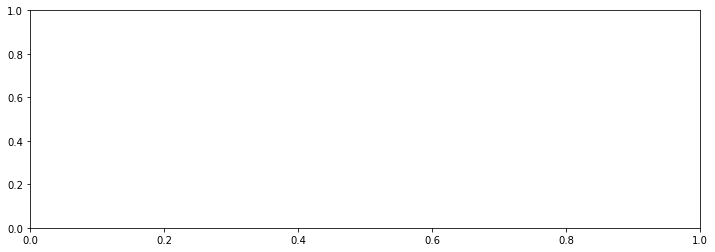

In [26]:
f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.plot(likelihood[4,:,0]-likelihood[25,:,1])
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

In [ ]:
likelihood = np.load('likelihood-june10.npy')

In [ ]:
#np.save('sherl_erd_adj-time1-june6.npy', sherl_erd_adj_time1) 
#np.save('sherl_erd_adj-time2-june6.npy', sherl_erd_adj_time2) 

#np.save('likelihood-june6.npy', likelihood) 

sherl_erd_adj_time1 = np.load('sherl_erd_adj-time1-last-june10.npy')
sherl_erd_adj_time2 = np.load('sherl_erd_adj-time2-last-june10.npy')

In [ ]:
sherl_erd_adj_time1 = np.load('sherl_erd_adj-time1-june10.npy')
sherl_erd_adj_time2 = np.load('sherl_erd_adj-time2-june10.npy')

In [ ]:
ev_time1 = brainiak.eventseg.event.EventSegment(88)
ev_time1.fit(sherl_erd_adj_time1)

ev_time2 = brainiak.eventseg.event.EventSegment(32)
ev_time2.fit(sherl_erd_adj_time2)
print((iteration+1)*step)

# save the variablility scores

coherent_ev1_var = ev_time1.event_var_
coherent_ev2_var = ev_time2.event_var_

# save likelihood scores
print(ev_time1.ll_[len(ev_time1.ll_)-1])
print(ev_time2.ll_[len(ev_time2.ll_)-1])


